In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import zscore

In [3]:
df = pd.read_csv("funcionarios_empresa.csv")

In [4]:
df.head()

,ID_Funcionario,Nome,Idade,Departamento,Cargo,Salario,Tempo_Empresa_Meses,Data_Admissao,Nivel_Educacao,Estado_Civil,Tipo_Contrato,Avaliacao_Performance,Horas_Extras_Mes,Beneficios,Faltas_Ultimo_Ano,Satisfacao_Trabalho
0,1,Tatiane Mendes 001,40,Vendas,Vendedor Jr,3685.36,4,2025-05-18,Superior Completo,Casado(a),CLT,4.8,5,953.49,1,5.6
1,2,Ana Silva 002,23,Marketing,Coordenador de Marketing,8081.03,1,2025-08-16,Superior Completo,Solteiro(a),CLT,2.4,7,964.51,2,5.2
2,3,Rafael Alves 003,36,TI,Desenvolvedor Pleno,8491.98,2,2025-07-17,Pós-graduação,Solteiro(a),CLT,2.7,7,483.34,4,5.7
3,4,Carla Souza 004,32,Operações,Gerente de Operações,9745.30,9,2024-12-19,Ensino Médio,Casado(a),CLT,3.4,12,980.71,1,7.0
4,5,Pedro Costa 005,33,Financeiro,Analista Financeiro Jr,3556.68,63,2020-07-13,Pós-graduação,Solteiro(a),CLT,3.9,10,1031.64,1,6.5


In [5]:
def descriptive_static(dataset: pd.DataFrame) -> None:
    assert isinstance(dataset, pd.DataFrame), "Dataset não é do tipo pd.DataFrame"

    df = dataset.copy()

    col_numeric = df.select_dtypes(include=['number']).columns
    col_object = df.select_dtypes(include=['object', 'category']).columns

    def static(col_type: str, name_col: str):
        if col_type in ["object", "category"]:
            print("*" * 10)
            print(f"COLUNA : {name_col}")
            print(f"TIPO : {col_type}")
            print(f"Numero total de instâncias : {len(df[name_col])}")
            print(f"Quantidade valores únicos : {df[name_col].nunique()}")
            print(f"Moda : {df[name_col].mode().iloc[0] if not df[name_col].mode().empty else 'N/A'}")
            print(f"Frequência da Moda : {df[name_col].value_counts().iloc[0] if not df[name_col].mode().empty else 'N/A'}")
            print(f"Quantidade de nulos : {df[name_col].isnull().sum()}")
        elif col_type == "number":
            from scipy.stats import trim_mean
            print("*" * 10)
            print(f"COLUNA : {name_col}")
            print(f"TIPO : {col_type}")
            print(f"Distribuição (5 primeiros):\n{df[name_col].value_counts().head()}")
            print(f"Média : {df[name_col].mean()}")
            print(f"Moda : {df[name_col].mode().iloc[0] if not df[name_col].mode().empty else 'N/A'}")
            print(f"Mediana : {df[name_col].median()}")
            print(f"Média aparada (10%) : {trim_mean(df[name_col].dropna(), 0.1)}")
            print(f"Amplitude : {df[name_col].max() - df[name_col].min()}")
            print(f"Desvio padrão : {df[name_col].std()}")
            print(f"Variância : {df[name_col].var()}")
            print(f"Quantis (0%, 25%, 50%, 75%, 100%):\n{df[name_col].quantile([0, 0.25, 0.5, 0.75, 1])}")
            print(f"Quantidade de nulos : {df[name_col].isnull().sum()}")

    for col in col_object:
        static("object", col)
    for col in col_numeric:
        static("number", col)

In [6]:
descriptive_static(df)

**********
COLUNA : Nome
TIPO : object
Numero total de instâncias : 500
Quantidade valores únicos : 500
Moda : Aline Dias 069
Frequência da Moda : 1
Quantidade de nulos : 0
**********
COLUNA : Departamento
TIPO : object
Numero total de instâncias : 500
Quantidade valores únicos : 7
Moda : Vendas
Frequência da Moda : 111
Quantidade de nulos : 0
**********
COLUNA : Cargo
TIPO : object
Numero total de instâncias : 500
Quantidade valores únicos : 31
Moda : Coordenador de Marketing
Frequência da Moda : 26
Quantidade de nulos : 0
**********
COLUNA : Data_Admissao
TIPO : object
Numero total de instâncias : 500
Quantidade valores únicos : 86
Moda : 2025-08-16
Frequência da Moda : 47
Quantidade de nulos : 0
**********
COLUNA : Nivel_Educacao
TIPO : object
Numero total de instâncias : 500
Quantidade valores únicos : 7
Moda : Superior Completo
Frequência da Moda : 179
Quantidade de nulos : 5
**********
COLUNA : Estado_Civil
TIPO : object
Numero total de instâncias : 500
Quantidade valores únicos 

In [7]:
def null_treatment(dataset: pd.DataFrame) -> pd.DataFrame:
    assert isinstance(dataset, pd.DataFrame), "Dataset não é do tipo pd.DataFrame"

    df = dataset.copy()

    cols_numeric = df.select_dtypes(include=['number']).columns
    cols_object = df.select_dtypes(include=['object', 'category']).columns

    for col in cols_numeric:
        df[col].fillna(df[col].mean(), inplace=True)

    for col in cols_object:
        if not df[col].mode().empty:
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna("Desconhecido", inplace=True)

    return df

In [8]:
df = null_treatment(df)

/tmp/ipykernel_20941/3443895737.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipykernel_20941/3443895737.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [9]:
df

,ID_Funcionario,Nome,Idade,Departamento,Cargo,Salario,Tempo_Empresa_Meses,Data_Admissao,Nivel_Educacao,Estado_Civil,Tipo_Contrato,Avaliacao_Performance,Horas_Extras_Mes,Beneficios,Faltas_Ultimo_Ano,Satisfacao_Trabalho
0,1,Tatiane Mendes 001,40,Vendas,Vendedor Jr,3685.36,4,2025-05-18,Superior Completo,Casado(a),CLT,4.800000,5,953.49,1,5.6
1,2,Ana Silva 002,23,Marketing,Coordenador de Marketing,8081.03,1,2025-08-16,Superior Completo,Solteiro(a),CLT,2.400000,7,964.51,2,5.2
2,3,Rafael Alves 003,36,TI,Desenvolvedor Pleno,8491.98,2,2025-07-17,Pós-graduação,Solteiro(a),CLT,2.700000,7,483.34,4,5.7
3,4,Carla Souza 004,32,Operações,Gerente de Operações,9745.30,9,2024-12-19,Ensino Médio,Casado(a),CLT,3.400000,12,980.71,1,7.0
4,5,Pedro Costa 005,33,Financeiro,Analista Financeiro Jr,3556.68,63,2020-07-13,Pós-graduação,Solteiro(a),CLT,3.900000,10,1031.64,1,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,Bruno Ferreira 496,25,Vendas,Coordenador de Vendas,7901.52,8,2025-01-18,Superior Incompleto,Casado(a),CLT,2.600000,10,629.04,3,9.2
496,497,Felipe Araújo 497,27,Vendas,Vendedor Jr,2200.82,4,2025-05-18,Mestrado,Solteiro(a),CLT,3.427368,8,584.25,1,8.3
497,498,Felipe Araújo 498,42,Operações,Gerente de Operações,9631.39,2,2025-07-17,Superior Completo,Casado(a),PJ,3.900000,9,1089.26,3,6.0
498,499,Pedro Costa 499,32,Marketing,Analista de Marketing Pleno,4788.13,27,2023-06-28,Ensino Médio,Solteiro(a),PJ,3.700000,11,576.16,2,9.0


In [10]:
def detect_outliers(dataset: pd.DataFrame):

    df = dataset.copy()
    cols_numeric = df.select_dtypes(include=['number']).columns

    for col in cols_numeric:
        zs = np.abs(zscore(df[col].dropna()))
        outliers = df[col][zs > 3]
        print(f"Coluna: {col} - Quantidade de outliers: {len(outliers)}")
        print(f"Valores dos outliers: {outliers.values}")

        # Visualização
        plt.figure()
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot de {col}')
        plt.show()

Coluna: ID_Funcionario - Quantidade de outliers: 0
Valores dos outliers: []


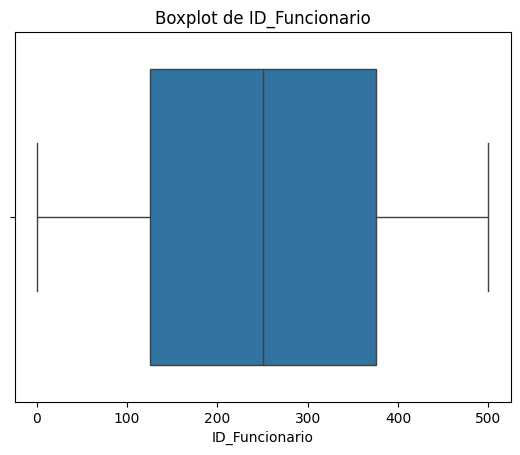

Coluna: Idade - Quantidade de outliers: 18
Valores dos outliers: [65 67 66 65 65 65 65 66 67 65 65 66 67 67 66 67 66 66]


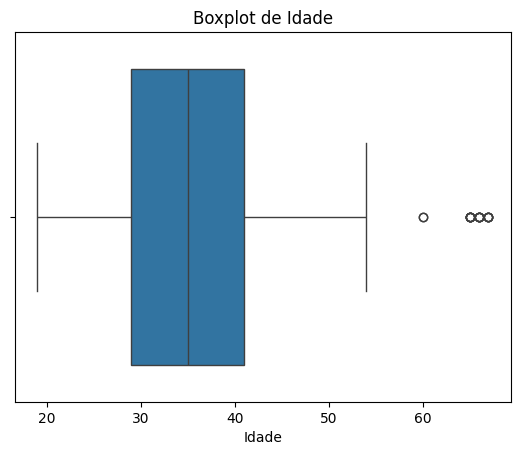

Coluna: Salario - Quantidade de outliers: 2
Valores dos outliers: [34134.45 37988.03]


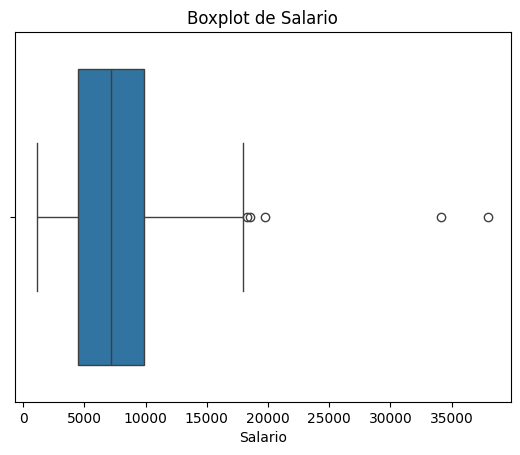

Coluna: Tempo_Empresa_Meses - Quantidade de outliers: 10
Valores dos outliers: [113  91 114  98 113 115 120 107 106  96]


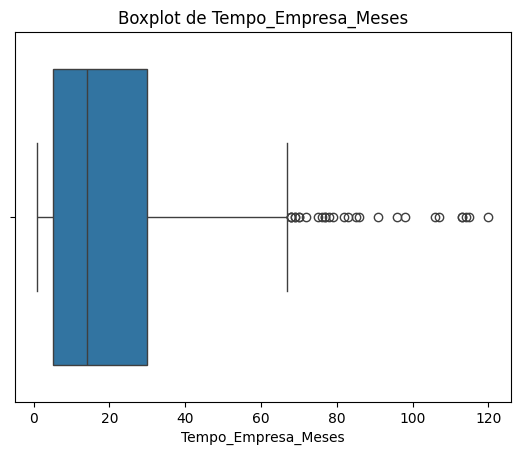

Coluna: Avaliacao_Performance - Quantidade de outliers: 3
Valores dos outliers: [1.  1.1 1.1]


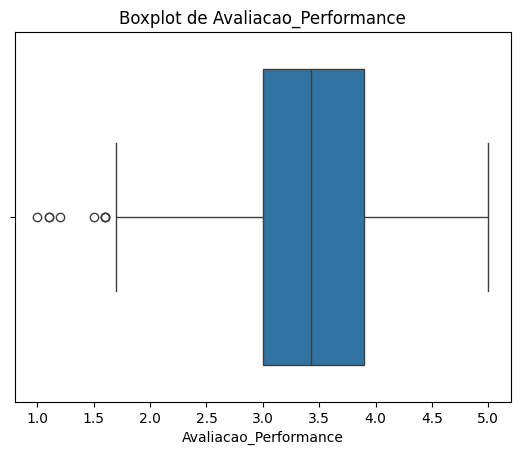

Coluna: Horas_Extras_Mes - Quantidade de outliers: 20
Valores dos outliers: [62 58 58 59 74 73 65 65 49 57 49 55 53 55 70 63 66 70 68 70]


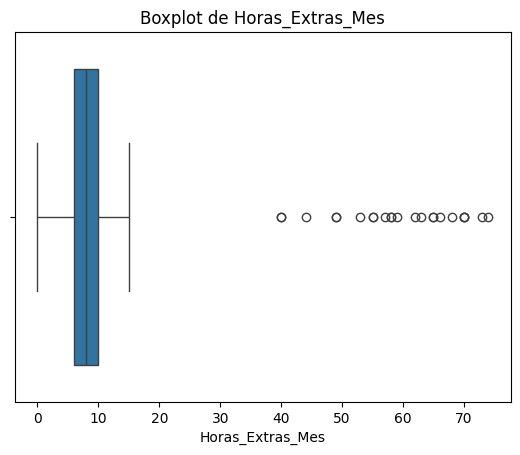

Coluna: Beneficios - Quantidade de outliers: 3
Valores dos outliers: [1585.25  149.1   171.72]


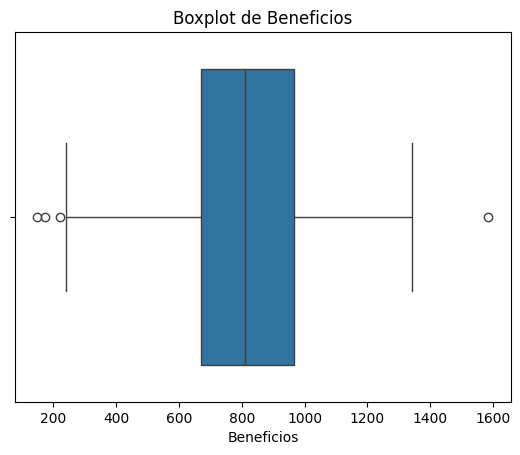

Coluna: Faltas_Ultimo_Ano - Quantidade de outliers: 2
Valores dos outliers: [7 7]


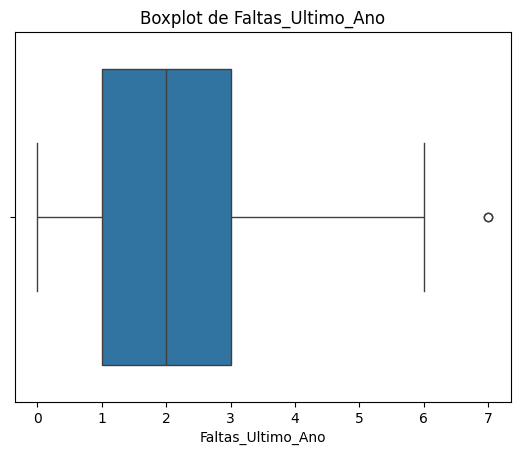

Coluna: Satisfacao_Trabalho - Quantidade de outliers: 2
Valores dos outliers: [1.7 1.8]


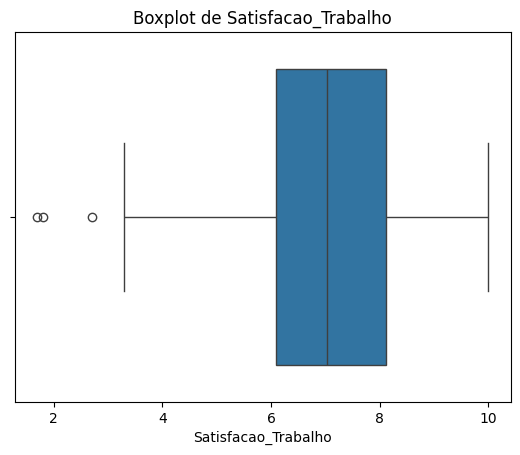

In [11]:
detect_outliers(df)